In [1]:
from importlib import reload
# watch for any changes in the sample_models module, and reload it automatically
%load_ext autoreload
%autoreload 2

In [2]:
# import NN architectures for speech recognition
import models as M
# import function for training acoustic model
import train_utils as T

import utils as U

import data_generator as DG

print()
# U.config_GPU(gpu_memory_fraction=0.5)
U.config_GPU(allow_growth = True)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.

/device:GPU:0


In [3]:
def reload_all():
    reload(U)
    reload(DG)
    reload(M)
    reload(T)

audio_gen_mfcc = None
audio_gen_spec = None
audio_gen_raw  = None

def init_gen(spectrogram=True, raw=False):
    print("Initializing Generator for ", 
          "Raw" if raw else
          ("MFCC" if not spectrogram else "Spectrogram"))
    if raw:
        audio_gen = DG.AudioGeneratorCached(spectrogram=False, raw=raw, minibatch_size=5)
    else:
        audio_gen = DG.AudioGeneratorCached(spectrogram=spectrogram)
        
    audio_gen.load_train_data('train_corpus.json')
    audio_gen.load_validation_data('valid_corpus.json')
    return audio_gen

def init_gen_var(spectrogram=True, raw=False):
    global audio_gen_mfcc
    global audio_gen_spec
    global audio_gen_raw
    if raw:
        if not audio_gen_raw:
            audio_gen_raw = init_gen(raw=True)
    elif spectrogram:
        if not audio_gen_spec:
            audio_gen_spec = init_gen(spectrogram=True)
    else:
        if not audio_gen_mfcc:
            audio_gen_mfcc = init_gen(spectrogram=False)

def get_gen(spectrogram=True, raw=False):
    init_gen_var(spectrogram, raw)
    return audio_gen_raw if raw else (audio_gen_spec if spectrogram else audio_gen_mfcc)
        
                                      
model_names_to_compare = []

def train_model(model_builder, *args, spectrogram=True, raw=False, mfcc_concat=False, **kwargs):
    reload(M)
    reload(T)
    global audio_gen_mfcc
    global audio_gen_spec
    global audio_gen_raw
    init_gen_var(spectrogram, raw)
    name = T.train_model(audio_gen_raw if raw else (audio_gen_spec if spectrogram else audio_gen_mfcc), model_builder, *args, **kwargs)
    model_names_to_compare.append(name)    

In [4]:
def plot_comparison(model_names=None, *args, **kwargs):
    reload(T)
    
    if model_names is None:
        names = model_names_to_compare
        print_model_names(names)
    else:
        names = model_names
    pickles = []
    for name in names:
        pickles.append("results/" + name + ".pickle")
    T.plot_comparison(pickles=pickles, *args, **kwargs)
    
def print_model_names(model_names=None):
    print_list_of_strings(model_names if model_names is not None else model_names_to_compare)
    
    
def print_list_of_strings(list_of_strings):
    print("[", end="")
    first = True
    for name in list_of_strings:
        if not first:
            print(",")
            print(" ", end="")
        else:
            first = False
        print("\'"+name+"\'", end="")
    print("]")

In [5]:
from utils import int_sequence_to_text

reload(M)
reload(T)
def test_gen():
    
    gen = DG.AudioGeneratorCached(raw=True, minibatch_size=1, sort_by_duration=True)
#     gen = DG.AudioGenerator(raw=True, minibatch_size=1, sort_by_duration=True)
    gen.load_train_data('train_corpus.json')
#     s_gen = DG.AudioGeneratorCached(spectrogram=True, minibatch_size=1, sort_by_duration=True)
#     s_gen.load_train_data('train_corpus.json')
#     m_gen = DG.AudioGeneratorCached(spectrogram=False, minibatch_size=1, sort_by_duration=True)
#     m_gen.load_train_data('train_corpus.json')
#     c_gen = DG.AudioGeneratorCached(spectrogram=True, mfcc_concat=True, minibatch_size=1, sort_by_duration=True)
#     c_gen.load_train_data('train_corpus.json')

# mfcc_audio_gen = DG.AudioGeneratorCached(spectrogram=False)
#     for i, j in zip(s_gen.next_train(), m_gen.next_train()):
#         break
    counter = 0
    for j in gen.next_train():
#         print(type(j), len(j), type(j[0]), type(j[1]))
#         print(j[0].keys())
#         print(j[1].keys())
        print(j[0]['the_input'].shape, j[0]['the_labels'].shape, end=' ')
        ints = j[0]['the_labels'][0]
        ints = [t+1 for t in ints]
        print("".join(int_sequence_to_text(ints)))
    
#         for m in range(0, j[0]['the_labels'].shape[1]):

#             print("{:02.0f}".format(j[0]['the_labels'][0][m]), end=' ')
#         print()
        counter += 1
        if counter > 30:
            break
        
#         break
# print(mfcc_audio_gen.next_train())

test_gen()

(1, 36880, 1) (1, 27) a great rascal put in north
(1, 36880, 1) (1, 38) mister verloc was fully responsive now
(1, 37040, 1) (1, 38) i get nothing but misery out of either
(1, 37040, 1) (1, 28) where are they asked the boy
(1, 37120, 1) (1, 26) alexander exclaimed mildly
(1, 37120, 1) (1, 27) tad is an experienced rider
(1, 37120, 1) (1, 24) hers has been prodigious
(1, 37200, 1) (1, 13) italian rusks
(1, 37360, 1) (1, 37) of course it ain't said missus bozzle
(1, 37360, 1) (1, 22) he's a great scientist
(1, 37440, 1) (1, 19) good by dear randal
(1, 37520, 1) (1, 26) humph grunted curley adams
(1, 37520, 1) (1, 30) here comes the snapping turtle
(1, 37600, 1) (1, 34) a little attack of nerves possibly
(1, 37680, 1) (1, 43) you'll all be over if you don't have a care
(1, 37760, 1) (1, 23) fried bread for borders
(1, 37840, 1) (1, 28) that's macklewain's business
(1, 37920, 1) (1, 29) at least that is what we hope
(1, 37920, 1) (1, 25) they persuaded eloquently
(1, 37920, 1) (1, 34) the 

Initializing Generator for  Raw
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 1)           0         
_________________________________________________________________
conv1d1 (Conv1D)             (None, None, 50)          200       
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 50)          200       
_________________________________________________________________
reluC0 (Activation)          (None, None, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
conv1d2 (Conv1D)             (None, None, 50)          7550  

Traceback (most recent call last):
  File "/opt/favordata/AI/udacity-project-nlp-speech-recognition/train_utils.py", line 205, in train_model
    callbacks=callbacks, verbose=verbose)
  File "/opt/favordata/anaconda3/lib/python3.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/opt/favordata/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "/opt/favordata/anaconda3/lib/python3.7/site-packages/keras/engine/training_generator.py", line 217, in fit_generator
    class_weight=class_weight)
  File "/opt/favordata/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 1217, in train_on_batch
    outputs = self.train_function(ins)
  File "/opt/favordata/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py", line 2715, in __call__
    return self._call(inputs)
  File "/opt/favordata/anaconda3/lib/python3.7/site-packages

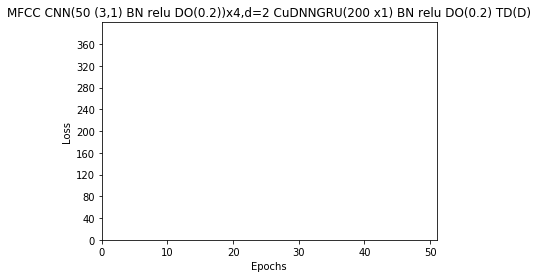

In [5]:
train_model(M.RNNModel(cnn_config=M.CNNConfig(filters=50,kernel_size=3, conv_stride=1, conv_border_mode="valid", 
                                              cnn_layers=4, dilation=2, # cnn_dropout_rate=0.2,
                                              cnn_activation_before_bn_do=False,
                                              cnn_do_bn_order=False), 
                       bd_merge=None,
                       rnn_type=M.RNNType.GRU, rnn_layers=1), raw=True, epochs=50)